In [93]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# 커널 서포트 벡터 머신

In [2]:
# SVM은 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것
# 분류와 회귀에 모두 사용할 수 있음
    # 여기선 분류 문제 사용하겠음, 회귀의 경우도 개념은 같음

# 직선과 초평면은 유연하지 못하여, 저차원 데이터셋에선 선형 모델이 매우 제한적임
# 선형 모델을 유연하게 만드는 한가지 방법은 특성끼리, 곱하거나, 특성을 거듭제곱 하는 식으로 새로운 특성을 추가하는 것

In [3]:
from sklearn.datasets import make_blobs

Text(0, 0.5, '특성 1')

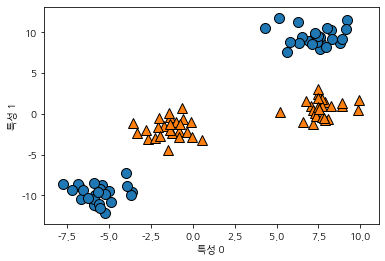

In [17]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2 # 0 or 1 특성 분류

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

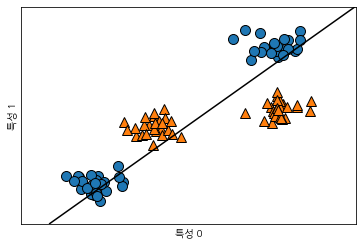

In [21]:
# 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있기때문에, 이런 데이터셋에는 잘 적중하지 않음
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0.5, 0, '특성 1 ** 2')

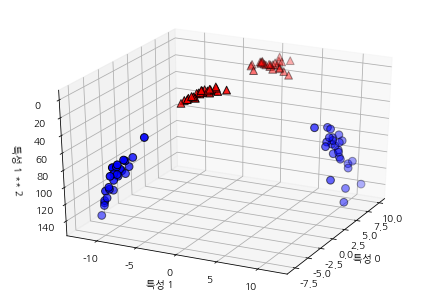

In [43]:
# 두번째 특성을 제곱한 새로운 특성을 추가해 입력 특성을 확장해보겠음
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X, X[:,1:]**2])
    # X[:,1:].shape > (100, 1), X[:,1].shape > (100,)
    # 두 배열을 왼쪽에서 오른쪽으로 붙이기, X배열에 X의 두번째 특성값을 제곱한 배열을 새롭게 붙인다. 총 세개의 특성을 가지게됨
    # np.r_[a, b]
    # np.hstack([a, b])
    # np.concatenate((a, b), axis = 0) 셋의 코드는 같은 기능을 한다
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev= -152, azim= -26)
# y == 0 인 포인트를 먼저 그리고, y == 1 인 포인트를 그리겠음
mask = y == 0 # y값이 0이면 True, 1이면 False boolean 값
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],color='blue',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')
    # mask, y==0, s매개변수 -> 도형 크기, cmap 매개변수 -> 컬러 스타일

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],color='red', marker = '^', 
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')
    # ~mask < 반전값 y==1
ax.set_xlabel('특성 0')
ax.set_ylabel('특성 1')
ax.set_zlabel('특성 1 ** 2')

Text(0.5, 0, '특성 1 ** 2')

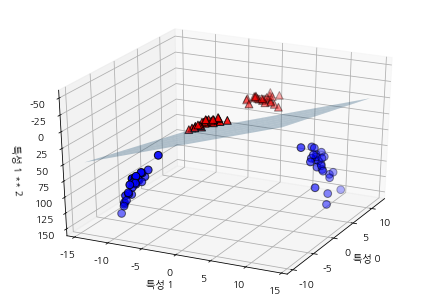

In [56]:
# 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분할 수 있음
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_ # ravel() 1차원 배열로 평평하게
# 결정경계 그리기
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev= -152, azim= -26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
    # 시작점과 끝점을 균일 간격으로 나눈 점들을 생성해주는 linspace()함수
    # 그래프를 더 폭넓게 그리기 위해, 최저값에서 -2, 최대값에서 +2 만큼 더 그림 범위 지정
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
    # meshgrid numpy의 meshgrid 명령을 통해 행단위와 열단위로 각각 해당 배열을 정방(square) 행렬로 선언
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha =.3)
# 경계면
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],color='blue',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],color='red', marker = '^', 
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.set_xlabel('특성 0')
ax.set_ylabel('특성 1')
ax.set_zlabel('특성 1 ** 2')


Text(0, 0.5, '특성 1')

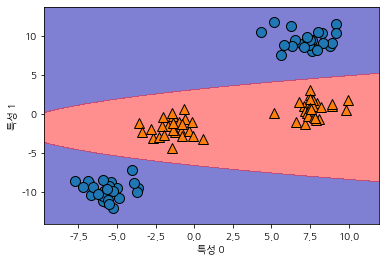

In [66]:
# 원래 특성으로 투영하면, 선형 SVM 모델은 더 이상 선형이 아닌, 타원에 가까워진 모습을 가짐
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
# contourf(Z)는 행렬 Z의 등치선을 포함하는 채워진 등고선 플롯을 만듬
# 여기서 Z는 x-y 평면의 높이 값을 포함, MATLAB®은 표시할 등고선을 자동으로 선택. Z의 열과 행 인덱스는 각각 평면의 x, y 좌표(XX, YY 로 지정)
# contourf(___,levels)는 위에 열거된 구문에서 표시할 등고선을 마지막 인수로 지정
# levels를 스칼라 값 n으로 지정하면 n개의 자동으로 선택된 레벨(높이)에 등고선이 표시
# 특정 높이에 등고선을 그리려면 levels를 단조 증가하는 값으로 구성된 벡터로 지정
# 하나의 높이(k)에 등고선을 그리려면 levels를 요소를 2개 가진 행 벡터 [k k]로 지정
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 커널 기법

In [67]:
# 데이터셋에 비선형 특성을 추가하여(특정 특성 제곱), 선형 모델을 더욱 강력하게 만들음
# 그러나, 많은 경우 어떤 특성을 추가해야할지 모르고, 특성을 많이 추가하면(ex_ 100개의 특성에서 가능한 모든 조합) 연산 비용이 커짐
# 수학적 기교 사용, 새로운 특성을 많이 만들지 않고 고차원에서 분류기 학습 가능
# 이를 커널 기법이라함, 실제 데이터를 확장하지 않고, 확장된 특성에 대한 포인트들의 거리(스칼라 곱)을 계산

In [68]:
# SVM에서 데이터를 고차원에 매핑하는데 많이 사용하는 방법은 두가지
# 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산(ex_ 특성1^2 * 특성2^5)하는 다항식 커널
# 가우시안(Gaussian) 커널로 불리는 RBF(radial basis function) 커널 존재
    # 차원이 무한한 특성 공간에 매핑하는 것 == 모든 차수의 모든 다항식을 고려함
    # 특성의 중요도는 고차항이 될수록 줄어듬
    # 지수함수의 테일러 급수 전개 때문_ 가우시안 커널은 지수함수의 테일러 전개를 이용, 무한한 다항식 차원으로 매핑하는 효과를 만듬

## SVM 이해하기(Gaussian_RBF)

In [70]:
# 학습이 진행되는 동안 SVM은 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지(importance)를 학습하게됨
# 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는데 영향을 줌, 두 클래스 사이의 경계에 위치한 데이터 포인트들
    # 이런 데이터 포인트를 서포트 벡터(support vector)라고 함
# 새로운 데이터 포인트에 대해 예측을 하기 위해선 각 서포터 벡터와의 거리를 측정함
# 분류에 대한 결정은 서포트 벡터까지의 거리에 기반

# 서포트 벡터의 중요도는 훈련 과정에서 학습함(SCV 객체의 dual_coef_ 속성에 저장됨)
    # 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산됨
    # 거리 = exp(-r * || x1 - x2 ||^2)
        # r : 가우시안 커널 폭 제어 매개변수, 0보다는 커야함
        # || x1-x2 || : 데이터 포인트 x1, x2 의 유클리디안 거리
            # "유클리안 거리" 계산 법을 "L2 Distance"라고도 한다
            # root_((p1 - q1)^2 + (p2 - q2)^2 + … + (pn - qn)^2)
            # root_(∑(1,n)*(pn - qn)^2)

Text(0, 0.5, '특성 1')

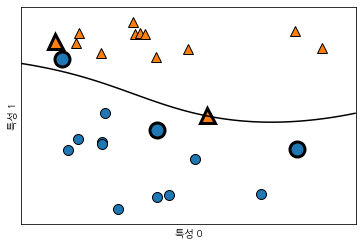

In [73]:
# 두개의 클래스를 가진 2차원 데이터셋 forge dataset -> 서포트 벡터 머신을 학습시킨 결과
    # SVM 굵은 테두리
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
# rbf == gaussian
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y)

# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨(서포트 벡터의 중요도)
sv_labels = svm.dual_coef_.ravel() > 0 # 서포트 벡터만 따로 추출

# 서포트 벡터 두껍게 표기
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel('특성 0')
plt.ylabel('특성 1')

In [74]:
# SVM은 매우 부드럽고 비선형적인 경계를 만듬
# 매개변수 C, gamma 에 대해서 알아보겠음

## SVM 매개변수 튜닝

In [75]:
# gamma 매개변수는 가우시안 커널 폭의 역수의 해당, r : 가우시안 커널 폭 제어 매개변수, 0보다는 커야함
# gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정
    # 작은 값은 넓은 영역을 뜻하며, 큰 값이라면 영향이 미치는 범위가 제한적(커널 폭의 역수이므로 _ 지수함수이기 때문)
    # 즉, 카우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐
        # gamma는 0보다 커야하므로 가우시안 커널 함수값의 범위는 e0(1) ~ e-∞(0) 사이임 _ 역수의 이유
        # 따라서 gamma 값이 작을수록 데이터 포인트의 영향 범위가 커짐
        
# C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수
# 이 매개변수는 각 포인트의 중요도(dual_coef_ 값)를 제한함

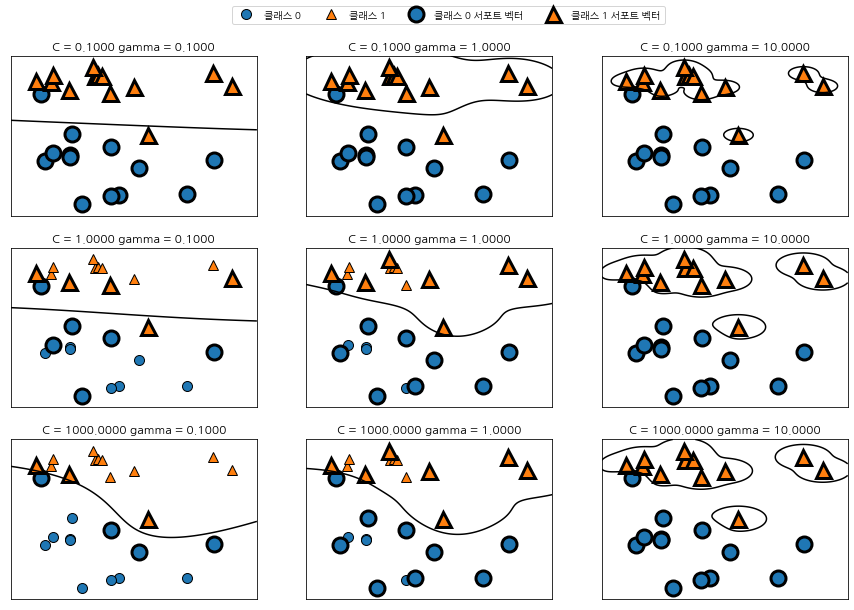

In [89]:
# 매개변수에 따른 변화
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1,0,3]):
    # C(규제 매개변수) : -1, 0, 3 -> 자연로그 e^C
    # -1 > 0.1, 0 > 1.0, 3 > 1000.0
    for ax_inner, gamma in zip(ax, [-1, 0, 1]):
        # gamma(가우시안 커널폭 역수) : -1, 0, 1
        # -1 > 0.1, 0 > 1.0, 1 > 10.0
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=ax_inner)
axes[0, 0].legend(['클래스 0','클래스 1','클래스 0 서포트 벡터','클래스 1 서포트 벡터'], ncol=4, loc =(.9,1.2))

In [94]:
# 우측으로 진행할수록 gamma값이 0.1 -> 10.0 으로 증가됨
# 작은 gamma값은 가우시안 커널의 반경을 크게하여 많은 포인트들이 가까이 있는 것으로 고려함
    # 따라서 왼쪽의 결정 경계들은 매우 부드럽고 오른쪽으로 갈수록 결정 경계는 포인트에 민감해짐(과적합 우려 가능성)
    # 작은 gamma값이 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮추며(단순), 큰 gamma값은 복잡한 모델을 만듬

# 아래로 진행 할 수록 C(규제관련) 매개변수는 0.1 > 1000.0 으로 증가됨
# 선형 모델과 마찬가지로 작은 C는 매우 제약이 큰 모델(단순한 모델)을 만들고 각 데이터 포인트의 영향력이 작음
# C를 증가시키면 각 포인트들이 모델에 큰 영향을 주며, 결정 경계를 휘어서 정확하게 분류하게끔 함(복잡한 모델)

# 왼쪽 위의 결정 경계는 거의 선형에 가까운걸 볼 수 있음, 잘못 분류된 데이터 포인트가 경계에 거의 영향력을 주지 않음(단순한 모델)

# 조절이 필요함

# gamma의 Default 는 auto, 특성 개수의 역수를 의미함
    # 즉, 1/X_train.shape[1]을 의미
    # 0.20ver gamma 매개변수 옵션에 scale 추가됨
        # scale 은 1/(X_train.shape[1] * X_train.std())로 스케일 조정이 되지 않은 특성에서 더 좋은 결과를 만들게끔함
        # 0.22ver 부터는 Default가 scale로 바뀜
        # SVM을 사용하기 전에 특성을 표준화 전처리 하면 scale, auto 차이는 없음
        # 지금 jupyter notebook ver : 0.22.1

## RBF 커널(gaussian) SVM을 유방암 데이터셋에 적용

In [176]:
# 기본값 C=1, gamma = n_features 사용
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC(gamma='auto').fit(X_train, y_train)
svc_scale = SVC(C=10000).fit(X_train, y_train)
print('훈련 세트 정확도 : {:.2f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(svc.score(X_test, y_test)))
print('svc_gamma-scale, C=10000_약한 규제 훈련 세트 정확도 : {:.2f}'.format(svc_scale.score(X_train, y_train)))
print('svc_gamma-scale, C=10000_약한 규제 테스트 세트 정확도 : {:.2f}'.format(svc_scale.score(X_test, y_test)))


훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.63
svc_gamma-scale, C=10000_약한 규제 훈련 세트 정확도 : 0.97
svc_gamma-scale, C=10000_약한 규제 테스트 세트 정확도 : 0.97


In [177]:
# gamma 가 auto면 과대적합이 일어난것을 볼 수 있다
# gamma 를 기본값인 scale을 사용하고, C(규제) 매개변수를 10000으로, 증가(약한 규제)시켰더니 스코어가 향상된 것을 볼 수 있다
    # C default : 1.0

Text(0, 0.5, '특성 크기')

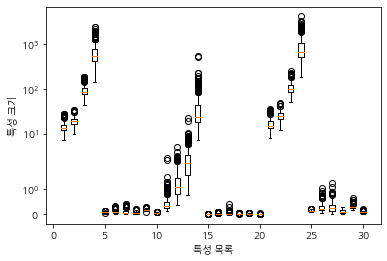

In [178]:
# 왜 auto의 경우에는 과대적합이 발생 했을까?
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')
plt.xlabel('특성 목록')
plt.ylabel('특성 크기')
# 특성들간의 스케일이 완전히 다름 -> SVM에서 아주큰 문제가 될 수 있음

In [179]:
# SVM 에서 특성 값의 범위가 비슷해지도록 전처리해서 문제를 해결 할 수도 있음
# 모든 특성 값을 평균이 0이고, 단위 분산이 되도록 하거나
# 0과 1사이로 맞추는 방법을 사용
    # StandardScaler or MinMaxScaler 전처리 메소드 사용 가능
    # 데이터의 성질에 따라서 어느 전처리 방법이 좋은지는 다름

# (X - min(X))/(max(X) - min(X))
    # 최대와 최소의 차가 분모가 되므로 결과는 항상 0 과 1 사이의 값이 됨
    # 데이터 셋에 따라 StandardScaler 도 사용 가능

In [193]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis = 0) #  axis = 0 x축을 기준으로 합을 구하는 방식
    # shape : (30, )
    
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis = 0)
    # 각 X_train값에서 최솟값을 뺀것의 최대값들

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최대값은 1
X_train_scaled = (X_train - min_on_training) / range_on_training

print('특성별 최솟값 \n',X_train_scaled.min(axis = 0))
print('특성별 최댓값 \n',X_train_scaled.max(axis = 0))

# 테스트 세트도 적용
# 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

svc_scaled = SVC(gamma='auto').fit(X_train_scaled, y_train)

print('스케일된 훈련 세트 정확도 : {:.2f}'.format(svc_scaled.score(X_train_scaled, y_train)))
print('스케일된 테스트 세트 정확도 : {:.2f}'.format(svc_scaled.score(X_test_scaled, y_test)))

svc_scaled_C = SVC(gamma='auto', C=1000).fit(X_train_scaled, y_train)

print('규제 1000 스케일된 훈련 세트 정확도 : {:.2f}'.format(svc_scaled_C.score(X_train_scaled, y_train)))
print('규제 1000 스케일된 테스트 세트 정확도 : {:.2f}'.format(svc_scaled_C.score(X_test_scaled, y_test)))

특성별 최솟값 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
스케일된 훈련 세트 정확도 : 0.95
스케일된 테스트 세트 정확도 : 0.95
규제 1000 스케일된 훈련 세트 정확도 : 0.99
규제 1000 스케일된 테스트 세트 정확도 : 0.97


In [194]:
# 스케일을 수동으로 지정했을때, 성능향상을 확인 할 수 있다.
# 또한 규제 파라미터를 조절했을때도 성능향상을 확인 할 수 있었다(C=1000, 약한 규제)